## Однородность Практика

### <b><span style='color:#686dec'>Загружаем данные</span></b>

 спользуем уже знакомый нам датасет <code>make_blobs</code>


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from itertools import cycle, islice

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [2]:
# Визуализируем исходные данные
def plot_scatter():
    plt.rcParams['figure.figsize'] = 3, 3
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], s=10,ec='k',alpha=0.25,color=colors[y_pred])

### <b><span style='color:#686dec'>Пример Кластеризации</span></b>

`Коэффициент силуэта` можно посчитать при помощи реализации из библиотеки `sklearn`

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X)
y_pred = kmeans.labels_ 

# теперь посчитаем однородность
homogeneity_score(labels_true=y, labels_pred=y_pred)

0.804474693112785

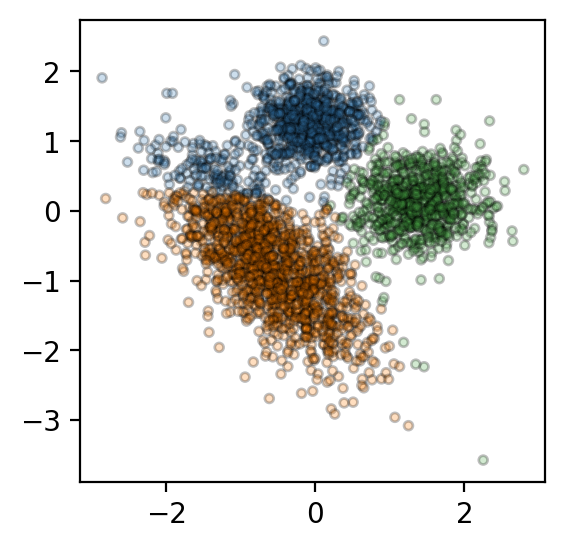

In [4]:
plot_scatter()

### <b><span style='color:#686dec'>Задание</span></b>

#### <b>Задание <span style='color:#F1A424'>4.12.1</span></b> 

Сравните результаты кластеризации алгоритмов `k-means`, `GaussianMixture`, `AgglomerativeClustering` и `DBSCAN` на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:

- `kmeans` — n_clusters=3, random_state=42
- `GaussianMixture` — n_components=3, random_state=42
- `AgglomerativeClustering` — n_clusters=3
- `DBSCAN` — eps=0.9, min_samples=35

В качестве ответа укажите максимальное значение однородности, полученное при помощи данных моделей

In [10]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import homogeneity_score

# K-Means
kmeans = KMeans(n_clusters=3,
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
homosc = homogeneity_score(labels_true=y, labels_pred=y_pred)
print('kmeans',round(homosc,4))

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
homosc = homogeneity_score(labels_true=y, labels_pred=y_pred)
print('gmm',round(homosc,4))

# Agglomerative Cluster
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
homosc = homogeneity_score(labels_true=y, labels_pred=y_pred)
print('agglomerative',round(homosc,4))

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
homosc = homogeneity_score(labels_true=y, labels_pred=y_pred)
print('dbscan',round(homosc,4))

kmeans 0.8045
gmm 0.934
agglomerative 0.91
dbscan 0.0004
